In [1]:
import numpy as np
from scipy import sparse
from sklearn.preprocessing import normalize

In [2]:
def extractFeatures():
    artistTags = np.zeros((18746, 12648))
    file = open("user_taggedartists.dat").readlines()
    for line in file[1:]:
        data = line.split('\t')
        artistTags[int(data[1])][int(data[2])] += 1
    artistTags = normalize(sparse.csr_matrix(artistTags))

    userArtists = np.zeros((2101, 18746))
    userGenres = np.zeros((2101, 12648))
    userExp = np.zeros(2101)
    file = open("user_artists.dat").readlines()
    for line in file[1:]:
        data = line.split('\t')
        userGenres[int(data[0])] += artistTags[int(data[1])]*int(data[2])
        userArtists[int(data[0])][int(data[1])] += [int(data[2])]
        userExp[int(data[0])] += 1
    userGenres = normalize(userGenres)
    return userGenres, userExp, userArtists

In [3]:
userGenres, userExp, userArtists = extractFeatures()

In [4]:
class modifiedEuclideanDistRecommender():
    def __init__(self, k, genres, exp, artists):
        self.k = k
        self.exp = exp
        self.genres = genres
        self.artists = artists
        
    def closestExperts(self, genreVec):
        tempGenres = np.subtract(self.genres, genreVec)
        tempGenres = np.transpose(np.divide(np.transpose(tempGenres), self.exp))
        dists = np.sqrt([np.dot(x, x) for x in tempGenres])
        indices = np.zeros(self.k, dtype = "i")
        for i in range(self.k):
            indices[i] = np.nanargmin(dists)
            dists[indices[i]] = float('nan')
        return(indices)
    
    def recommend(self, genreVec):
        experts = self.closestExperts(genreVec)
        experts_artist_weight = {}
        weights = np.zeros(len(self.artists[0]))
        for i in experts:
            weights = np.add(weights, self.artists[i])
        return(weights)
    
    def topNArtists(self, genreVec, n):
        recs = self.recommend(genreVec)
        top = np.zeros(n, dtype = 'i')
        for i in range(n):
            top[i] = np.argmax(recs)
            recs[top[i]] = 0
        return(top)

In [46]:
numberOfRecommenders_vs_accuracy = []

for numRecommender in range(1,11):
    allaccuracy = 0
    for i in range(20):
        test_userId = np.random.choice((range(0, 2101)), replace=False)
        genres = np.concatenate((userGenres[:test_userId],userGenres[test_userId+1:]), axis=0)
        exp = np.concatenate((userExp[:test_userId],userExp[test_userId+1:]), axis=0)
        artists = np.concatenate((userArtists[:test_userId],userArtists[test_userId+1:]), axis=0)
    
        recommender = modifiedEuclideanDistRecommender(numRecommender, genres, exp, artists)
        recs = recommender.topNArtists(np.array(userGenres[test_userId, :]), 10)
        correct = sum([1 for r in recs if userArtists[test_userId, r] != 0])/10
        allaccuracy += correct
    numberOfRecommenders_vs_accuracy.append(allaccuracy/20)

/Users/badamosor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/badamosor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


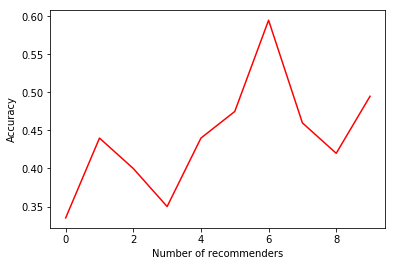

In [58]:
import matplotlib.pyplot as plt
plt.plot(numberOfRecommenders_vs_accuracy, 'r')
plt.xlabel('Number of recommenders')
plt.ylabel('Accuracy')
plt.show()

In [53]:
print(numberOfRecommenders_vs_accuracy)

[0.335, 0.44000000000000006, 0.4000000000000001, 0.35, 0.44000000000000006, 0.475, 0.595, 0.4600000000000001, 0.4200000000000001, 0.4950000000000001]


In [ ]:
import matplotlib.pyplot as plt
plt.plot(numberOfRecommenders_vs_accuracy, 'r')
plt.xlabel('Number of recommenders')
plt.ylabel('Average accuracy')
plt.show()